In [1]:
# Import bibliotek

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
# Wczytanie danych

df = pd.read_csv('27521-0001-Data.tsv', sep='\t', header=0)

In [3]:
# Wyświetlenie danych sprawdzając poprawność wczytania

df

,CASEID,QUESTID,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,LARCENY,MTRTHEFT,FRAUD,PROPCRME,DRUG,DRUGSALE,ALLARRST,SAXMDE,MDEGT12M,SAXMDEGT
0,1,2000033,1,99,99,18,9999,99,1,3,...,0,0,0,0,0,0,0,0,0,0
1,2,2000140,1,99,99,13,9999,99,4,93,...,0,0,0,0,0,0,0,0,0,0
2,3,2000202,1,99,99,28,9999,99,4,93,...,0,0,0,0,0,0,0,0,0,0
3,4,2000220,1,99,99,12,9999,99,4,93,...,0,0,0,0,0,0,0,0,0,0
4,5,2000257,1,99,99,12,9999,99,4,93,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55597,55598,7171687,2,99,99,991,9991,91,91,91,...,0,0,0,0,0,0,0,0,-1,0
55598,55599,7171703,1,99,99,20,9999,99,1,30,...,0,0,0,0,0,0,0,0,0,0
55599,55600,7171712,1,99,99,12,9999,99,1,30,...,0,0,0,0,0,0,0,-1,-1,-1
55600,55601,7171865,1,99,99,19,9999,99,2,93,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Zmiana stylu wyświetlania danych tak, aby widoczne były wszystkie kolumny

pd.set_option('display.max_columns', None)

In [5]:
# Wybranie kolumn do wstępnej analizy

cols = ['DEPRESSIONINDEX', 'DEPEPISODE', 'ANYTXRXMDE', 'CATAG7', 'IRSEX', 'NEWRACE2', 'ANYINDEX', 'MJANDCOKE', 'ILLICITDRUGUSE', 'LSYRILLICIT', 'COKECRACK', 'OTHERILLICIT',
        'MARJLTYR', 'MJCOKELY', 'COCCRKLY', 'MJGT12MO', 'COCGT12MO', 'ANYGT12MO', 'ALCFMFPB', 'IREDUC2', 'EDU_DUMMY', 'INCOME', 'INCOME_R', 'POVERTY', 'IRPRVHLT', 'WORKFORCE', 'EMPSTAT4', 
        'REVERSEPOP', 'MOVESPY2', 'CACHAR', 'CATYPE', 'CRIMEHIST', 'ANYSDRUG', 'ANYATTACK', 'ANYTHEFT', 'NUMARREST', 'HEALTH2', 'SCHDSICK', 'SCHDSKIP', 'TXLCAD', 'DSTNCALM', 'DSTTIRE',
        'DSTSITST', 'DSTDEPRS', 'DSTCHEER', 'DSTNRVOS', 'IRMARIT', 'NOMARR2',
        'RKIDSHH', 'MARRIED', 'CHILDRENINHOME',
        'YOWRSATP', 'YOWRSPLN', 'YO_MDEA3', 'YO_MDEA4',
        'ADWRDLOT', 'ADWRSTHK', 'ADWRSLEP', 'ADWRSMOR', 'ADWRELES']

df = df[cols]
df

,DEPRESSIONINDEX,DEPEPISODE,ANYTXRXMDE,CATAG7,IRSEX,NEWRACE2,ANYINDEX,MJANDCOKE,ILLICITDRUGUSE,LSYRILLICIT,COKECRACK,OTHERILLICIT,MARJLTYR,MJCOKELY,COCCRKLY,MJGT12MO,COCGT12MO,ANYGT12MO,ALCFMFPB,IREDUC2,EDU_DUMMY,INCOME,INCOME_R,POVERTY,IRPRVHLT,WORKFORCE,EMPSTAT4,REVERSEPOP,MOVESPY2,CACHAR,CATYPE,CRIMEHIST,ANYSDRUG,ANYATTACK,ANYTHEFT,NUMARREST,HEALTH2,SCHDSICK,SCHDSKIP,TXLCAD,DSTNCALM,DSTTIRE,DSTSITST,DSTDEPRS,DSTCHEER,DSTNRVOS,IRMARIT,NOMARR2,RKIDSHH,MARRIED,CHILDRENINHOME,YOWRSATP,YOWRSPLN,YO_MDEA3,YO_MDEA4,ADWRDLOT,ADWRSTHK,ADWRSLEP,ADWRSMOR,ADWRELES
0,0,0,0,5,1,7,0.142857,1,1,1,1,0,1,1,0,1,1,1,2,11,1,3,1,3,1,1,2,3,0,7,1,0,0,0,0,0,1,99,99,-1,99,99,99,99,5,4,4,99,0,0,0,99,99,99,99,99,99,99,99,99
1,0,0,0,4,1,1,0.142857,1,1,0,0,0,0,0,0,1,0,1,2,10,1,2,1,2,1,0,3,2,1,7,1,0,0,0,0,0,2,99,99,-1,99,99,99,99,4,4,4,99,0,0,0,99,99,99,99,99,99,99,99,99
2,0,0,0,7,1,1,0.142857,0,0,0,0,0,0,0,0,0,0,0,93,10,1,2,3,3,1,0,4,3,0,6,1,0,0,0,0,0,1,99,99,-1,99,99,99,99,5,5,1,1,0,1,0,99,99,99,99,99,99,99,99,99
3,0,0,0,5,1,1,0.500000,1,1,1,0,1,1,1,0,1,0,1,2,10,1,4,1,3,1,0,4,2,0,6,1,1,0,0,0,0,2,99,99,-1,99,99,99,99,5,4,4,99,0,0,0,99,99,99,99,99,99,99,99,99
4,0,0,0,7,2,1,0.142857,1,1,0,0,0,0,0,0,1,0,1,93,8,0,4,1,3,1,1,2,3,0,6,6,0,0,0,0,0,2,99,99,-1,99,99,99,99,4,3,1,1,1,1,1,99,99,99,99,99,99,99,99,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55597,-9,-1,-9,5,1,1,0.142857,0,0,0,0,0,0,0,0,0,0,0,2,10,1,1,1,1,2,1,2,1,0,2,6,0,0,0,0,0,2,1,2,-1,99,5,99,5,99,5,4,99,0,0,0,99,99,99,99,99,99,99,99,99
55598,0,0,0,5,1,1,0.142857,1,1,0,1,1,0,0,0,1,1,1,2,6,0,2,2,2,1,1,1,2,1,6,1,1,0,0,0,0,3,99,99,-1,99,99,99,99,5,4,1,1,1,1,1,99,99,99,99,99,99,99,99,99
55599,-9,-1,-9,5,2,1,0.142857,1,1,0,1,1,0,0,0,1,1,1,93,8,0,1,1,1,1,0,4,2,1,6,1,0,0,0,0,0,3,99,99,-1,99,4,4,4,4,5,1,1,1,1,1,99,99,99,99,99,99,99,99,99
55600,0,0,0,6,1,1,0.142857,1,1,0,0,0,0,0,0,1,0,1,2,11,1,3,2,3,1,1,1,2,1,6,1,0,0,0,0,0,1,99,99,-1,99,99,99,99,5,3,1,1,0,1,0,99,99,99,99,99,99,99,99,99


**DEPRESSIONINDEX** *(Adult & Youth Depression Index)*</br>
• 0 (no depression) - 9 (high depression),</br>
• -9 (not given depression module)</br></br>

**DEPEPISODE** *(Major Depressive Episode-Lifetime)*</br>
• 0 (no episode),</br>
• 1 (episode),</br>
• -1 (Missing - blank)</br></br>

**ANYTXRXMDE** *(Any MDE Treatment or Meds Last Year)*</br>
• 0 (no),</br>
• 1 (yes),</br>
• -9 (missing)</br></br>

**CATAG7** *(Age Category Recode (7 Levels))*</br>
• 1 (12-13 yo),</br>
• 2 (14-15 yo),</br>
• 3 (16-17 yo),</br>
• 4 (18-20 yo),</br>
• 5 (21-25 yo),</br>
• 6 (26-34 yo),</br>
• 7 (35+ yo)</br></br>

**IRSEX** *(Imputation Revised Gender)*</br>
• 1 (Male),</br>
• 2 (Female)</br></br>

**NEWRACE2** *(Race/Hispanicity Recode (7 Levels))*</br>
• 1 (NonHisp White),</br>
• 2 (NonHisp Black/Afr Am),</br>
• 3 (NonHisp Native Am/AK Native),</br>
• 4 (NonHisp Native HI/Other Pac Isl),</br>
• 5 (NonHisp Asian),</br>
• 6 (NonHisp more than one race),</br>
• 7 (Hispanic)</br></br>

**ANYINDEX** *(Any Drug Dependency Index)*</br>
• 0.1429 (Low Dependence) - 1.0000 (High Dependence),</br>
• -1.0000 (Blank)</br></br>

**MJANDCOKE** *(Use of Marijuana or Cocaine/Crack--Ever)*</br>
• 0 (Never used),</br>
• 1 (Used lifetime)</br></br>

**ILLICITDRUGUSE** *(Use of Any Illicit Drug Ever)*</br>
• 0 (No use),</br>
• 1 (Use)</br></br>

**LSYRILLICIT** *(Illicit Drug Use in Last Year)*</br>
• 0 (No use),</br>
• 1 (Use)</br></br>

**COKECRACK** *(Use of Coke or Crack)*</br>
• 0 (No use),</br>
• 1 (Use),</br>
• -1 (Missing - Blank)</br></br>

**OTHERILLICIT** *(Use of Illicit Drugs Other Than Coke and MJ--Ever Used)*</br>
• 0 (Never Used),</br>
• 1 (Used)</br></br>

**MARJLTYR** *(Marijuana--Used Past Year)*</br>
• 0 (Never used past year),</br>
• 1 (Used past year)</br></br>

**MJCOKELY** *(Use of Marijuana or Cocaine/Crack--Past Year)*</br>
• 0 (Never used in past year),</br>
• 1 (Used in past year)</br></br>

**COCCRKLY** *(Cocaine or Crack Last Year)*</br>
• 0 (No),</br>
• 1 (Yes)</br></br>

**MJGT12MO** *(Marijuana Use Greater Than 12 Months Ago)*</br>
• 0 (No),</br>
• 1 (Yes),</br>
• -9 (Missing)</br></br>

**COCGT12MO** *(Cocaine Use Greater Than 12 Months Ago)*</br>
• 0 (No),</br>
• 1 (Yes),</br>
• -9 (Missing)</br></br>

**ANYGT12MO** *(Any Drug Use Greater Than 12 Months Ago)*</br>
• 0 (No),</br>
• 1 (Yes),</br>
• -9 (Missing)</br></br>

**ALCFMFPB** *(Drunk Alcohol Cause PRBS With Family/Friends Past 12 Months)*</br>
• 1 (Yes),</br>
• 2 (No),</br>
• 83, 91, 93, 94, 97, 98 (Missing)</br></br>

**IREDUC2** *(Recode - Imputations Revised Education)*</br>
• 1 (<5th grade),</br>
• 2 (6th grade),</br>
• 3 (7th grade),</br>
• 4 (8th grade),</br>
• 5 (9th grade),</br>
• 6 (10th grade),</br>
• 7 (11th grade),</br>
• 8 (12th grade),</br>
• 9 (Freshman/13th grade),</br>
• 10 (Sophomore/14th year or Junior/15th year),</br>
• 11 (Senior/16th year or GradProf School (or higher))</br></br>

**EDU_DUMMY** *(Education Dummy)*</br>
• 0 (HS or less),</br>
• 1 (More than HS)</br></br>

**INCOME** *(Total Family Income Recode)*</br>
• 1 (Less than $20,000),</br>
• 2 ($20,000 - $49,999),</br>
• 3 ($50,000 - $74,999),</br>
• 4 (+$75,000)</br></br>

**INCOME_R** *(Individual Income)*</br>
• 1 (Less than $10,000),</br>
• 2 ($10,000 - $19,999),</br>
• 3 ($20,000 - $29,999),</br>
• 4 ($30,000 - $39,999),</br>
• 5 ($40,000 - $49,999),</br>
• 6 ($50,000 - $74,999),</br>
• 7 (+$75,000)</br></br>

**POVERTY** *(Family Income as Percentage of Federal Poverty Threshold)*</br>
• 1 (<100% of fed poverty threshold),</br>
• 2 (100% - 199% of fed poverty threshold),</br>
• 3 (>=200% of fed poverty threshold)</br></br>

**IRPRVHLT** *(Imputation Revised Private Health Insurance)*</br>
• 1 (Yes, R does have private health insurance),</br>
• 2 (No, R does not have private health insurance),</br></br>

**WORKFORCE** *(Working at All)*</br>
• 0 (Not working at all),</br>
• 1 (Working at all),</br>
• -1 (Missing - Blank)</br></br>

**EMPSTAT4** *(Imputation Revised Employment Status 18+)*</br>
• 1 (Employed full time),</br>
• 2 (Employed part time),</br>
• 3 (Unemployed),</br>
• 4 (Other (incl. not in labor force)),</br>
• 99 (Missing - 12-17 year olds)</br></br>

**REVERSEPOP** *(Population Density)*</br>
• 1 (Segment not in a MSA),</br>
• 2 (Segment in a MSA with fewer than 1 million persons),</br>
• 3 (Segment in a MSA with 1 million or more persons)</br></br>

**MOVESPY2** *(# Times Moved Past 12 Months)*</br>
• 0 (None),</br>
• 1 (1 time),</br>
• 2 (2 times),</br>
• 3 (3+ times),</br>
• 994, 997, 998 (Missing - DK/Refused/Blank)</br></br>

**CACHAR** *(Controlled Access Housing Characteristic)*</br>
• 1 (Military Base),</br>
• 2 (Student Housing),</br>
• 3 (Reservation / Tribal Land),</br>
• 4 (Other Group Quarters - Shelter/etc),</br>
• 5 (Senior Housing / Assisted Living),</br>
• 6 (Other House / Single Unit),</br>
• 7 (Other Apartment/Condo, 2-9 units),</br>
• 8 (Other Apartment/Condo, 10-49 units),</br>
• 9 (Other Apartment/Condo, 50+ units),</br>
• -9 (Missing - Blank)</br></br>

**CATYPE** *(Controlled Access Barrier Type)*</br>
• 1 (None),</br>
• 2 (Guard/Doorman/Staff/Manager),</br>
• 3 (Intercom/Buzzer with no unit labels),</br>
• 4 (Intercom/Buzzer with unit labels),</br>
• 5 (Physical Barrier - lock/gate/dog/etc),</br>
• 6 (Other),</br>
• -9 (Missing - Blank)</br></br>

**CRIMEHIST** *(Ever Arrested and Booked for Breaking the Law)*</br>
• 0 (No),</br>
• 1 (Yes),</br>
• -1 (Missing - Blank)</br></br>

**ANYSDRUG** *(Did Youth or Adult Sell Illegal Drugs w/in Past 12 Months?)*</br>
• 0 (No drug sales),</br>
• 1 (Drug sales),</br>
• -1 (Missing - Blank)</br></br>

**ANYATTACK** *(Did Youth or Adult Assault Anyone w/in Past 12 Months?)*</br>
• 0 (No assault),</br>
• 1 (Assault),</br>
• -1 (Missing - Blank)</br></br>

**ANYTHEFT** *(Did Youth or Adult Steal/Attempt Steal Anything Worth > %50 w/in Past 12 Months?)*</br>
• 0 (No theft),</br>
• 1 (Theft),</br>
• -1 (Missing - Blank)</br></br>

**NUMARREST** *(Number of Times Arrested and Booked Past Year)*</br>
• 0 (None),</br>
• 1 (one),</br>
• 2 (two),</br>
• 3 (three or more)</br>
• -9 (Missing)</br></br>

**HEALTH2** *(Overall Health Recode)*</br>
• 1 (Excellent (HEALTH=1)),</br>
• 2 (Very Good (HEALTH=2)),</br>
• 3 (Good (HEALTH=3)),</br>
• 4 (Fair/Poor (HEALTH=4,5)),</br>
• -9 (Missing - Unknown (HEALTH=94,97))</br></br>

**SCHDSICK** *(How Many Days Missed School From Sick)*</br>
• 0 (None),</br>
• 89, 90, 94, 97, 98, 99 (Missing)</br></br>

**SCHDSKIP** *(How Many Days Missed School From Skipping)*</br>
• 0 (None),</br>
• 89, 94, 97, 98, 99 (Missing),</br></br>

**TXLCAD** *(Last or Current Treatment for Alcohol or Drugs)*</br>
• 0 (Alcohol only),</br>
• 1 (Drugs),</br>
• -1 (Missing)</br></br>

**DSTNCALM** *(How Often Couldn't Calm Down in Worst Month)*</br>
• 1 (All of the time),</br>
• 2 (Most of the time),</br>
• 3 (Some of the time),</br>
• 4 (A little of the time),</br>
• 5 (None of the time),</br>
• 94, 97, 98, 99 (Missing)</br></br>

**DSTTIRE** *(How Often Tired Out in Worst Month)*</br>
• 1 (All of the time),</br>
• 2 (Most of the time),</br>
• 3 (Some of the time),</br>
• 4 (A little of the time),</br>
• 5 (None of the time),</br>
• 89, 94, 97, 98, 99 (Missing)</br></br>

**DSTSITST** *(How Often Couldn't Sit Still in Worst Month)*</br>
• 1 (All of the time),</br>
• 2 (Most of the time),</br>
• 3 (Some of the time),</br>
• 4 (A little of the time),</br>
• 5 (None of the time),</br>
• 94, 97, 98, 99 (Missing)</br></br>

**DSTDEPRS** *(How Often Felt Depressed in Worst Month)*</br>
• 1 (All of the time),</br>
• 2 (Most of the time),</br>
• 3 (Some of the time),</br>
• 4 (A little of the time),</br>
• 5 (None of the time),</br>
• 89, 94, 97, 98, 99 (Missing)</br></br>

**DSTCHEER** *(How Often Couldn't Be Cheered Up in Worst Month)*</br>
• 1 (All of the time),</br>
• 2 (Most of the time),</br>
• 3 (Some of the time),</br>
• 4 (A little of the time),</br>
• 5 (None of the time),</br>
• 85, 94, 97, 98, 99 (Missing)</br></br>

**DSTNRVOS** *(How Often Felt Nervous in Worst Month, Past 12 Months)*</br>
• 1 (All of the time),</br>
• 2 (Most of the time),</br>
• 3 (Some of the time),</br>
• 4 (A little of the time),</br>
• 5 (None of the time),</br>
• 85, 89, 94, 97, 98, 99 (Missing)</br></br>

**IRMARIT** *(Imputation Revised Marital Status)*</br>
• 1 (Married),</br>
• 2 (Widowed),</br>
• 3 (Divorced or Seperated),</br>
• 4 (Never Been Married),</br>
• 99 (Missing - Legitimate Skip, Respondent is <= 14 yo)</br></br>

**NOMARR2** *(Number of Times Married)*</br>
• 1 (One time),</br>
• 2 (Two or more times),</br>
• 94, 97, 99 (Missing)</br></br>

**RKIDSHH** *(R's Kids <18 in HH)*</br>
• 0 (No kids),</br>
• 1 (Kids),</br>
• -1 (Missing - Blank)</br></br>

**MARRIED** *(Married)*</br>
• 0 (Not married),</br>
• 1 (Married)</br></br>

**CHILDRENINHOME** *(Children in Home)*</br>
• 0 (No children in home),</br>
• 1 (1+ children in home)</br></br>

**YOWRSATP** *(When Problems Worst Make a Suicide Attempt)*</br>
• 1 (Yes),</br>
• 2 (No),</br>
• 94, 97, 98, 99 (Missing)</br></br>

**YOWRSPLN** *(When Problems Worst Make a Plan to Kill Yourself)*</br>
• 1 (Yes),</br>
• 2 (No),</br>
• 94, 97, 98, 99 (Missing)</br></br>

**YO_MDEA4** *(Changes in Appetite or WT)*</br>
• 1 (Has symptom),</br>
• 2 (Does not have symptom)</br>
• 94, 97, 98, 99 (Missing)</br></br>

**YO_MDEA3** *(Changes in Appetite or WT)*</br>
• 1 (Has symptom),</br>
• 2 (Does not have symptom)</br>
• 94, 97, 98, 99 (Missing)</br></br>

**ADWRDLOT** *(When Problems Worst Think a Lot About Death)*</br>
• 1 (Yes),</br>
• 2 (No),</br>
• 94, 97, 98, 99 (Missing)</br></br>

**ADWRSTHK** *(When Problems Worst Think About Commiting Suicide)*</br>
• 1 (Yes),</br>
• 2 (No),</br>
• 94, 97, 98, 99 (Missing)</br></br>

**ADWRSLEP** *(When Problems Worst PRBS Sleeping/Waking Early)*</br>
• 1 (Yes),</br>
• 2 (No),</br>
• 94, 97, 98, 99 (Missing)</br></br>

**ADWRSMOR** *(When Problems Worst Sleep a Lot More Than Usual)*</br>
• 1 (Yes),</br>
• 2 (No),</br>
• 94, 97, 98, 99 (Missing)</br></br>

**ADWRELES** *(When Problems Worst Have Smaller Appetite Every Day)*</br>
• 1 (Yes),</br>
• 2 (No),</br>
• 94, 97, 98, 99 (Missing)</br></br>

In [6]:
# Zastąpienie wartości danych uważanych jako braki na NaN

missing_values = [-9, -1, 83, 85, 89, 90, 91, 93, 94, 97, 98, 99, 994, 997, 998]
df = df.replace(missing_values, np.nan)

In [7]:
# Usunięcie wierszy, w których brakuje wartości w kolumnach DEPRESSIONINDEX i DEPEPISODE

df = df.dropna(subset=['DEPRESSIONINDEX', 'DEPEPISODE'])

In [8]:
# Sprawdzenie ilości brakujących wartości w danych

missing_values_count = df.isnull().sum()
missing_values_count = missing_values_count.sort_values(ascending=False)
missing_values_count

DSTDEPRS           36583
DSTSITST           36583
DSTTIRE            36583
DSTNCALM           36583
TXLCAD             35975
ADWRSMOR           35947
YOWRSATP           35151
YOWRSPLN           35146
YO_MDEA3           33706
YO_MDEA4           33699
ADWRELES           33114
ADWRSTHK           33105
ADWRSLEP           33104
ADWRDLOT           33100
NOMARR2            27309
ALCFMFPB           21065
SCHDSICK           18378
SCHDSKIP           18343
DSTNRVOS           18160
DSTCHEER           18130
EMPSTAT4           18064
IRMARIT             9036
ANYGT12MO           2015
MJGT12MO            1609
COKECRACK            925
NUMARREST            590
COCGT12MO            517
CATYPE                79
ANYSDRUG              76
CRIMEHIST             75
ANYTHEFT              52
ANYATTACK             41
ANYTXRXMDE            32
ANYINDEX              25
MOVESPY2              23
RKIDSHH               15
HEALTH2               10
CACHAR                 7
WORKFORCE              4
INCOME_R               0


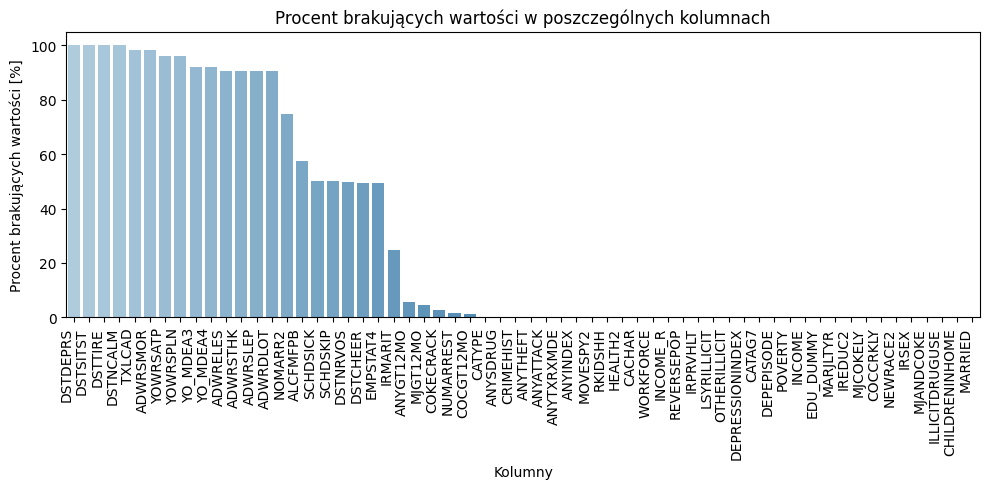

In [9]:
# Sprawdzenie procentowej ilości brakujących wartości w danych i wyświetlenie ich w postaci wykresu

missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=missing_values_percentage.index,
    y=missing_values_percentage.values,
    palette='Blues_d',
    hue=missing_values_percentage.index)
plt.title('Procent brakujących wartości w poszczególnych kolumnach')
plt.ylabel('Procent brakujących wartości [%]')
plt.xlabel('Kolumny')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Powyższy wykres przedstawia procent brakujących wartości w poszczególnych kolumnach, na którym można zauważyć, że dla większości kolumn nie jest konieczne ich usuwanie ani uzupełnianie braków. Jednak występują kolumny, których braki przekraczają 50% ilości danych, w związku z czym podjąłem decyzję o ich usunięciu.

In [10]:
# Usunięcie kolumn, w których procent brakujących wartości przekracza 50%

threshold_drop = 50
columns_to_drop = missing_values_percentage[missing_values_percentage > threshold_drop].index

df_cleaned = df.drop(columns=columns_to_drop)

DSTNRVOS           49.640543
DSTCHEER           49.558538
EMPSTAT4           49.378126
IRMARIT            24.699997
ANYGT12MO           5.508023
MJGT12MO            4.398218
COKECRACK           2.528497
NUMARREST           1.612771
COCGT12MO           1.413225
CATYPE              0.215947
ANYSDRUG            0.207747
CRIMEHIST           0.205013
ANYTHEFT            0.142143
ANYATTACK           0.112074
ANYTXRXMDE          0.087472
ANYINDEX            0.068338
MOVESPY2            0.062871
RKIDSHH             0.041003
HEALTH2             0.027335
CACHAR              0.019135
WORKFORCE           0.010934
NEWRACE2            0.000000
CATAG7              0.000000
IRSEX               0.000000
DEPRESSIONINDEX     0.000000
DEPEPISODE          0.000000
LSYRILLICIT         0.000000
ILLICITDRUGUSE      0.000000
MJANDCOKE           0.000000
IRPRVHLT            0.000000
POVERTY             0.000000
IREDUC2             0.000000
OTHERILLICIT        0.000000
COCCRKLY            0.000000
MARJLTYR      

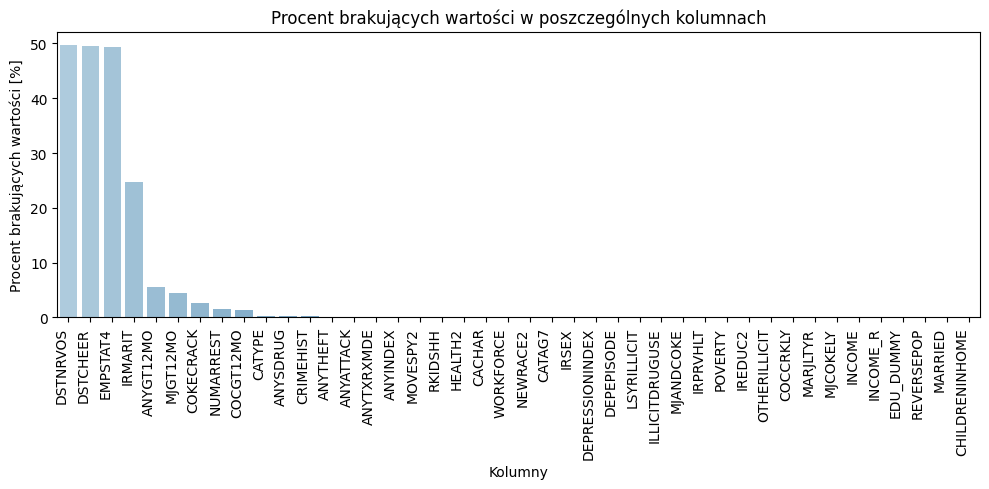

In [11]:
# Ponowne sprawdzenie procentowej ilości brakujących wartości w danych i wyświetlenie ich w postaci wykresu

missing_values_percentage = (df_cleaned.isnull().sum() / len(df)) * 100
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)

print(missing_values_percentage)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=missing_values_percentage.index,
    y=missing_values_percentage.values,
    palette='Blues_d',
    hue=missing_values_percentage.index)
plt.title('Procent brakujących wartości w poszczególnych kolumnach')
plt.ylabel('Procent brakujących wartości [%]')
plt.xlabel('Kolumny')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Po dokonaniu operacji usunięcia kolumn, których ilość braków przekraczała 50% ilości wszystkich danych można zauważyć cztery kolumny, które nadal są przedstawiane przez ograniczone dane. Przeglądając charakterystykę dla tych kolumn zauważyłem, że braki dla kolumn "EMPSTAT4" i "IRMARIT" wynikają z tego, że respondent nie spełniał kryterium dotyczącego wieku. Tym samym postanowiłem o zamianę wartości NaN na wartość "5", co wskazuje niespełnione kryterium wieku jednocześnie zachowując te dane. Kolumny "DSTNRVOS" i "DSTCHEER" odrzuciłem.

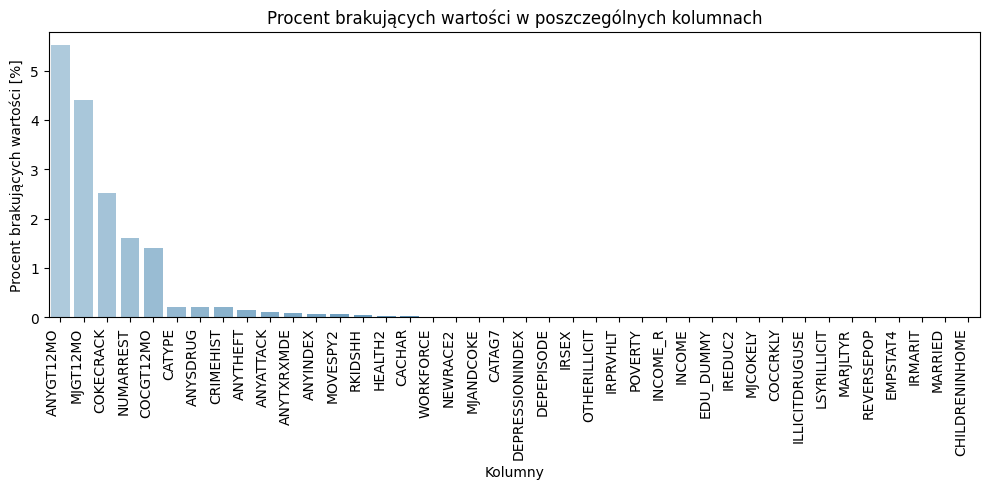

In [12]:
# Zmiana NaN na nową wartość dla kolumn EMPSTAT4 i IRMARIT oraz usunięcie kolumn DSTNRVOS i DSTCHEER

df_cleaned['EMPSTAT4'] = df_cleaned['EMPSTAT4'].fillna('5') # 5 - Niepełnoletni
df_cleaned['IRMARIT'] = df_cleaned['IRMARIT'].fillna('5') # 5 - Nie spełnia minimalnego wieku
df_cleaned = df_cleaned.drop(columns=['DSTNRVOS', 'DSTCHEER'])

missing_values_percentage = (df_cleaned.isnull().sum() / len(df)) * 100
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=missing_values_percentage.index,
    y=missing_values_percentage.values,
    palette='Blues_d',
    hue=missing_values_percentage.index)
plt.title('Procent brakujących wartości w poszczególnych kolumnach')
plt.ylabel('Procent brakujących wartości [%]')
plt.xlabel('Kolumny')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Tym razem na wykresie można zauważyć, że procent brakujących danych nie przekracza 6%, w związku z tym postanowiłem usunąć wiersze, które zawierały jakiekolwiek braki tym samym tworząc kompletny dataset.

In [13]:
# Usunięcie wierszy, w których występują braki

df_cleaned = df_cleaned.dropna()

In [14]:
# Wyświetlenie oczyszczonych danych

df_cleaned

,DEPRESSIONINDEX,DEPEPISODE,ANYTXRXMDE,CATAG7,IRSEX,NEWRACE2,ANYINDEX,MJANDCOKE,ILLICITDRUGUSE,LSYRILLICIT,COKECRACK,OTHERILLICIT,MARJLTYR,MJCOKELY,COCCRKLY,MJGT12MO,COCGT12MO,ANYGT12MO,IREDUC2,EDU_DUMMY,INCOME,INCOME_R,POVERTY,IRPRVHLT,WORKFORCE,EMPSTAT4,REVERSEPOP,MOVESPY2,CACHAR,CATYPE,CRIMEHIST,ANYSDRUG,ANYATTACK,ANYTHEFT,NUMARREST,HEALTH2,IRMARIT,RKIDSHH,MARRIED,CHILDRENINHOME
0,0.0,0.0,0.0,5,1,7,0.142857,1,1,1,1.0,0,1,1,0,1.0,1.0,1.0,11,1,3,1,3,1,1.0,2.0,3,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0,0
1,0.0,0.0,0.0,4,1,1,0.142857,1,1,0,0.0,0,0,0,0,1.0,0.0,1.0,10,1,2,1,2,1,0.0,3.0,2,1.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0,0
2,0.0,0.0,0.0,7,1,1,0.142857,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,10,1,2,3,3,1,0.0,4.0,3,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0
3,0.0,0.0,0.0,5,1,1,0.500000,1,1,1,0.0,1,1,1,0,1.0,0.0,1.0,10,1,4,1,3,1,0.0,4.0,2,0.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0,0
4,0.0,0.0,0.0,7,2,1,0.142857,1,1,0,0.0,0,0,0,0,1.0,0.0,1.0,8,0,4,1,3,1,1.0,2.0,3,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55593,0.0,0.0,0.0,5,2,1,0.142857,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,10,1,1,1,1,1,1.0,2.0,1,2.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0,0
55594,0.0,0.0,0.0,4,2,2,0.142857,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,9,1,1,1,1,1,0.0,3.0,1,1.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0,0
55596,0.0,0.0,0.0,5,2,1,0.142857,0,1,0,0.0,1,0,0,0,0.0,0.0,1.0,11,1,2,3,3,2,1.0,1.0,1,0.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0,0
55598,0.0,0.0,0.0,5,1,1,0.142857,1,1,0,1.0,1,0,0,0,1.0,1.0,1.0,6,0,2,2,2,1,1.0,1.0,2,1.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1,1


In [15]:
# Przypisanie nazw kolumn do zmiennej

cols_act = df_cleaned.columns
cols_act

Index(['DEPRESSIONINDEX', 'DEPEPISODE', 'ANYTXRXMDE', 'CATAG7', 'IRSEX',
       'NEWRACE2', 'ANYINDEX', 'MJANDCOKE', 'ILLICITDRUGUSE', 'LSYRILLICIT',
       'COKECRACK', 'OTHERILLICIT', 'MARJLTYR', 'MJCOKELY', 'COCCRKLY',
       'MJGT12MO', 'COCGT12MO', 'ANYGT12MO', 'IREDUC2', 'EDU_DUMMY', 'INCOME',
       'INCOME_R', 'POVERTY', 'IRPRVHLT', 'WORKFORCE', 'EMPSTAT4',
       'REVERSEPOP', 'MOVESPY2', 'CACHAR', 'CATYPE', 'CRIMEHIST', 'ANYSDRUG',
       'ANYATTACK', 'ANYTHEFT', 'NUMARREST', 'HEALTH2', 'IRMARIT', 'RKIDSHH',
       'MARRIED', 'CHILDRENINHOME'],
      dtype='object')

In [16]:
# Usunięcie kolumn DEPRESSIONINDEX i ANYTXRXMDE, celem uniknięcia korelacji z DEPEPISODE

df_cleaned = df_cleaned.drop(columns=['DEPRESSIONINDEX', 'ANYTXRXMDE'])

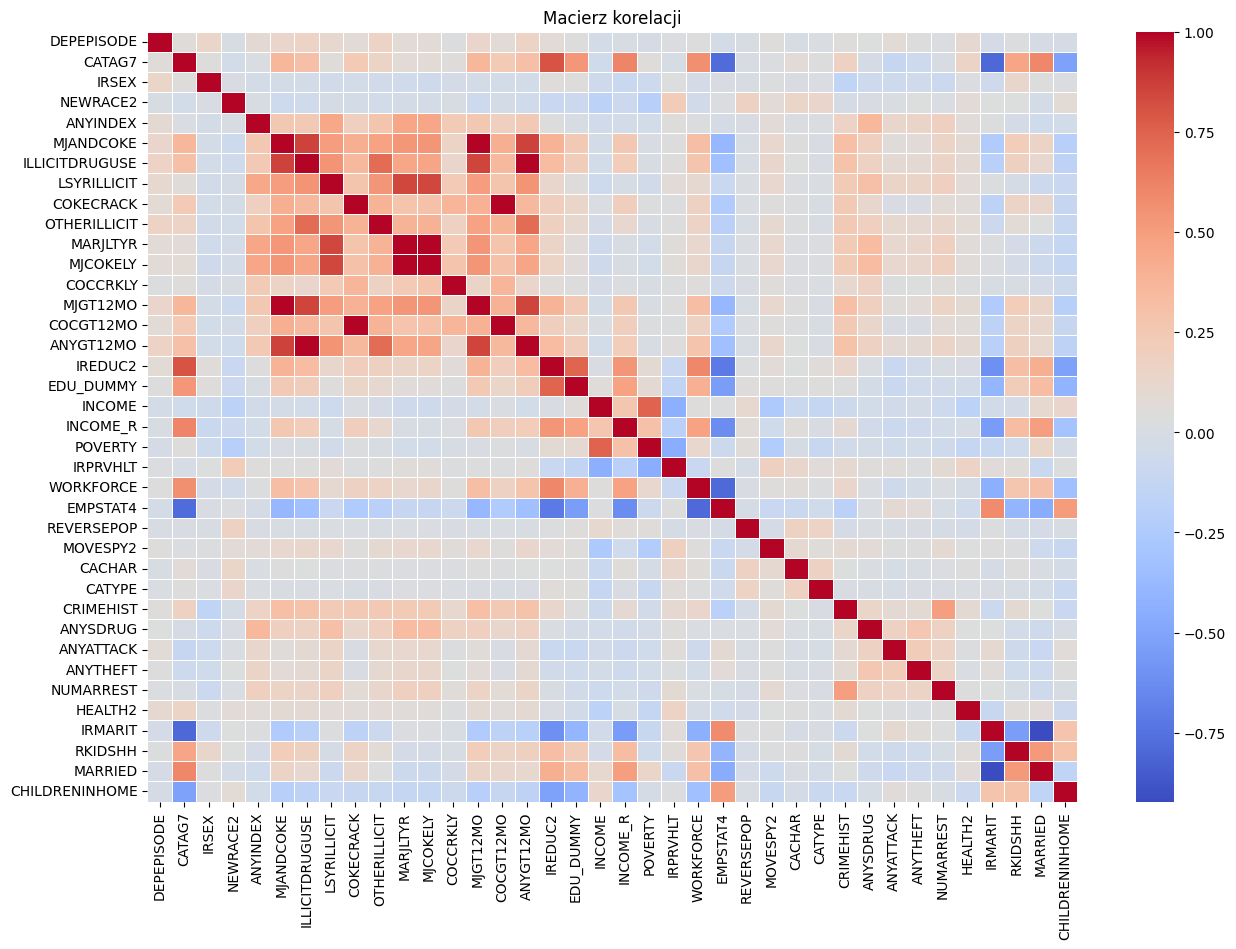

In [17]:
# Wyświetlenie macierzy korelacji

corr_matrix = df_cleaned.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Macierz korelacji")
plt.show()

Macierz korelacji pozwala zauważyć, że większość zmiennych nie wykazuje istotnych korelacji, co wskazuje na ich potencjalną niezależność w analizie względem występowania depresji u respondenta.

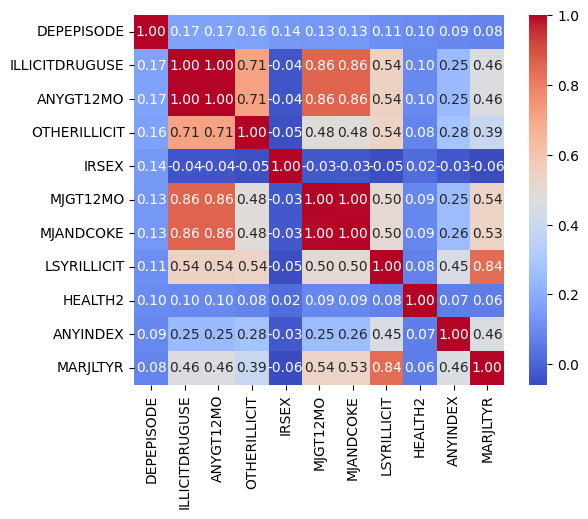

DEPEPISODE        1.000000
ILLICITDRUGUSE    0.165401
ANYGT12MO         0.165401
OTHERILLICIT      0.163699
IRSEX             0.139174
MJGT12MO          0.134612
MJANDCOKE         0.134508
LSYRILLICIT       0.111047
HEALTH2           0.099982
ANYINDEX          0.092785
MARJLTYR          0.080852
MJCOKELY          0.080515
ANYATTACK         0.079847
IREDUC2           0.079844
COCGT12MO         0.078119
COKECRACK         0.078119
CATAG7            0.055851
MOVESPY2          0.048793
CRIMEHIST         0.048351
ANYTHEFT          0.046196
EDU_DUMMY         0.044344
WORKFORCE         0.043392
ANYSDRUG          0.035324
RKIDSHH           0.029717
COCCRKLY          0.027534
IRPRVHLT          0.024283
NUMARREST         0.019701
CATYPE            0.009506
CACHAR            0.000856
INCOME_R         -0.002917
REVERSEPOP       -0.003643
NEWRACE2         -0.004957
POVERTY          -0.017022
MARRIED          -0.017197
CHILDRENINHOME   -0.019577
IRMARIT          -0.021586
INCOME           -0.029086
E

In [18]:
# Wyświetlenie korelacji z kolumną DEPEPISODE

k = 11
cols = corr_matrix.nlargest(k, 'DEPEPISODE')['DEPEPISODE'].index
cm = np.corrcoef(df_cleaned[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap="coolwarm")
plt.show()

sorted_corr = corr_matrix['DEPEPISODE'].sort_values(ascending=False)
sorted_corr

Wyświetlone na wykresie zmienne, które są najlepiej skorelowane z czynnikiem "DEPEPISODE", potwierdzają analizę poprzedniej macierzy, gdzie kolumny wskazują na swoją niezależność. Niestety korelacja każdej z nich względem "DEPEPISODE" jest bardzo słaba.

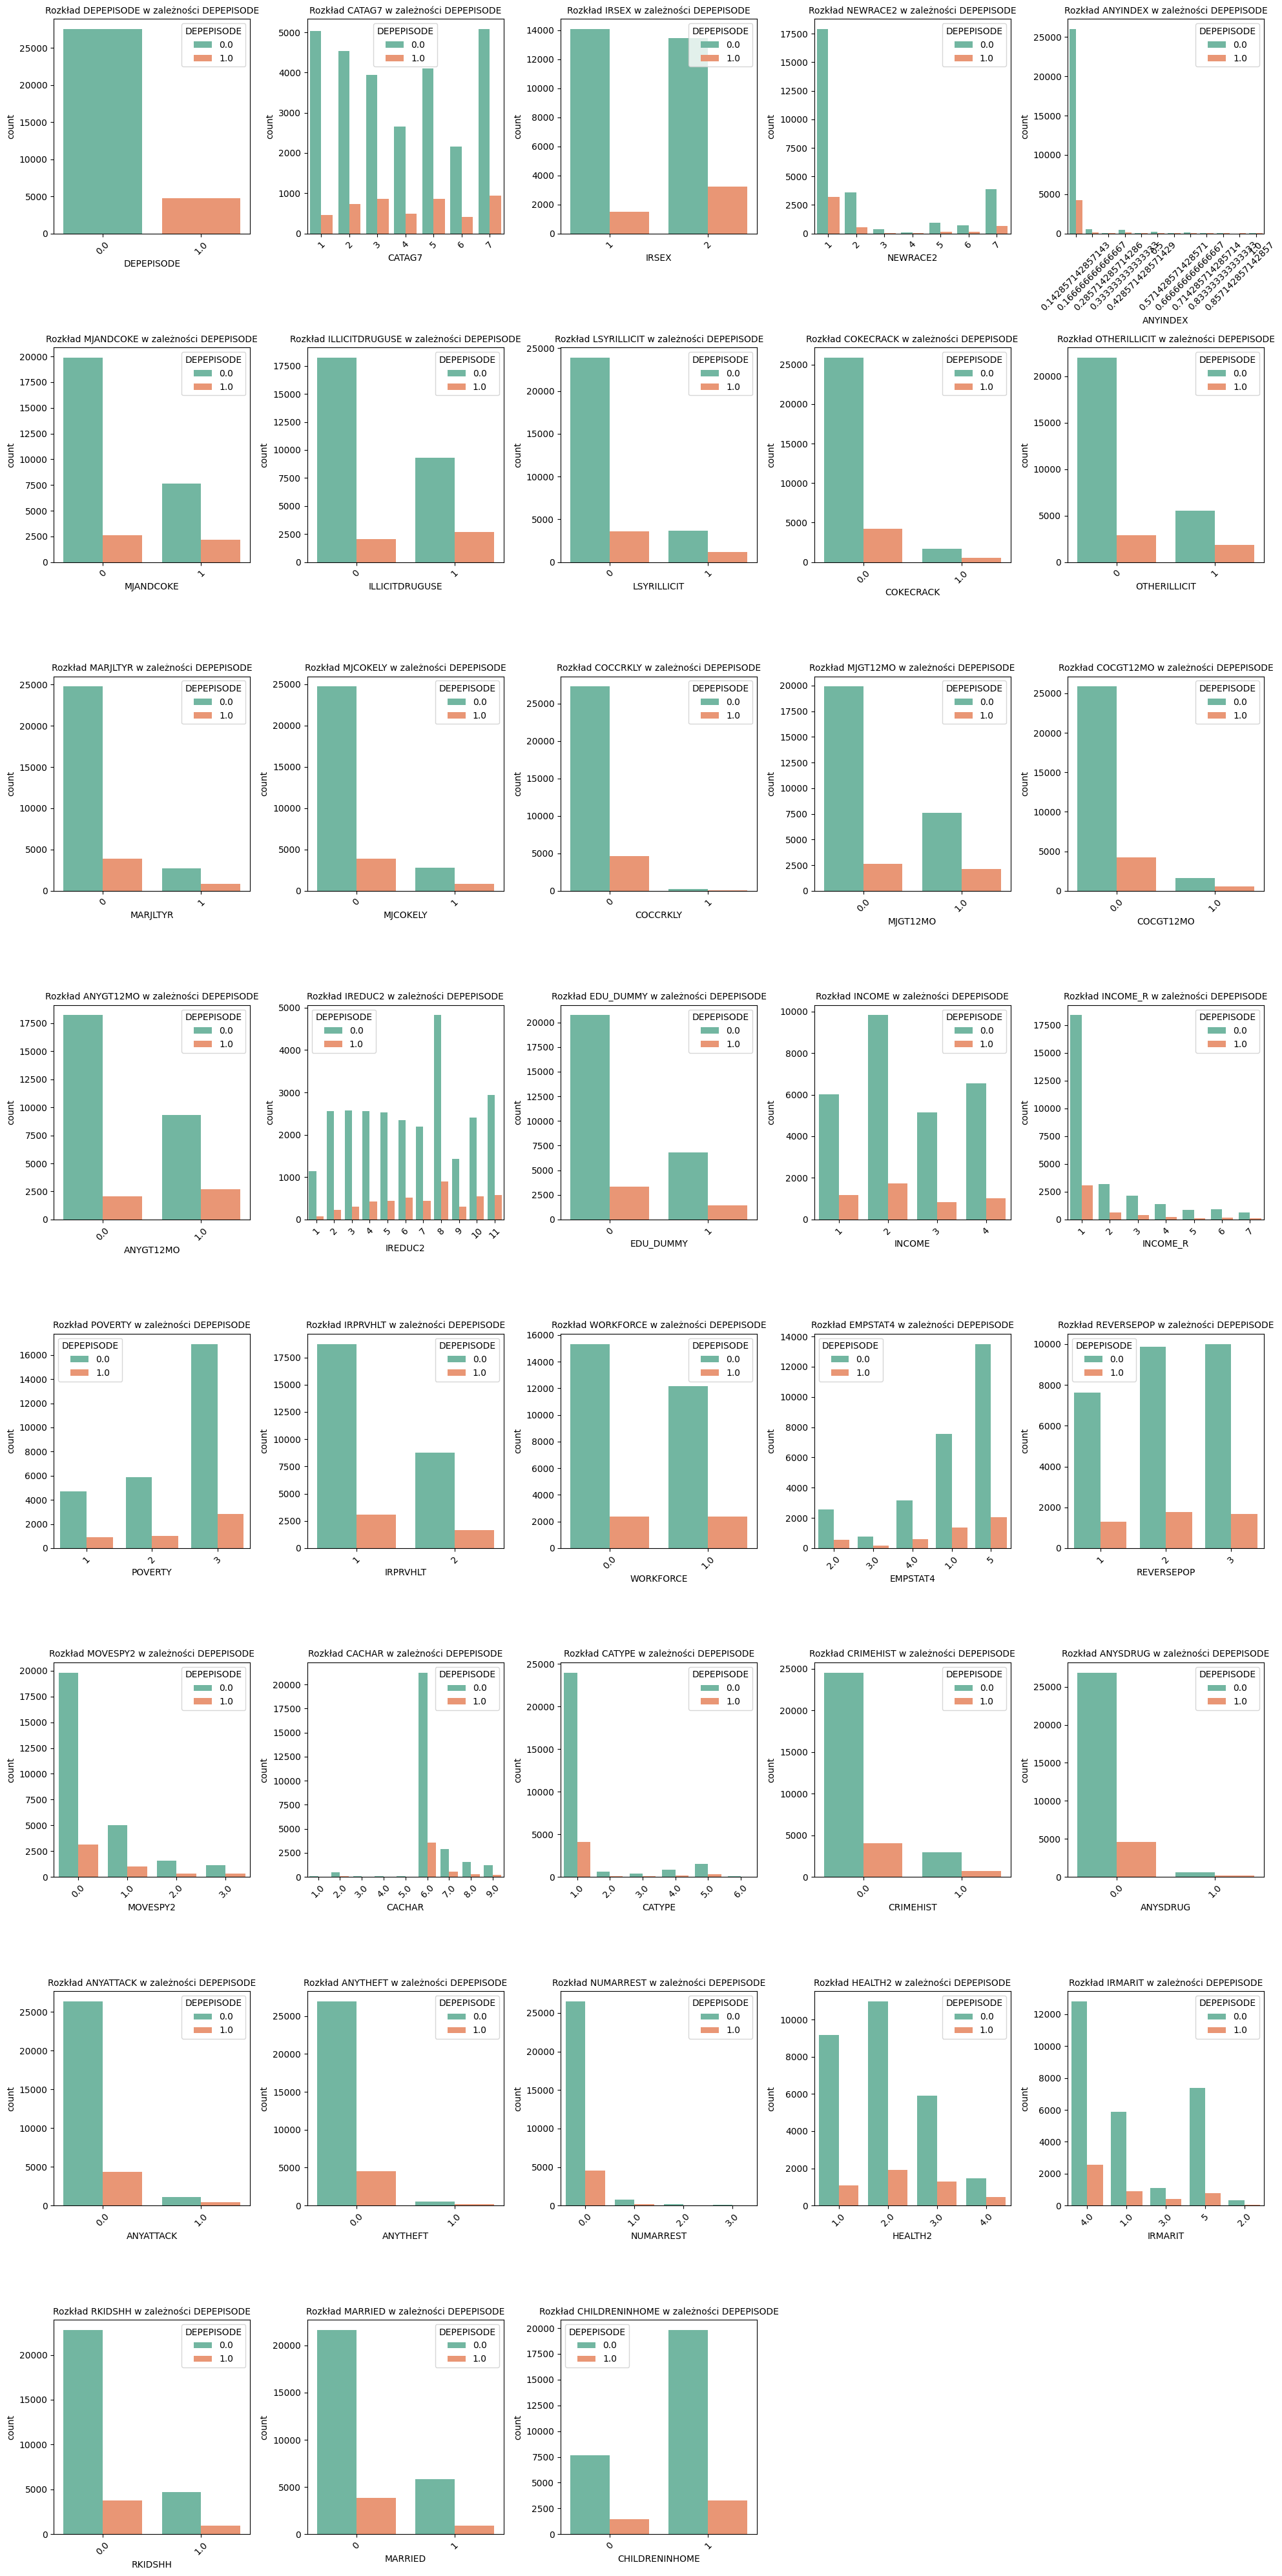

In [19]:
# Wyświetlenie wykresów rozkładu zmiennych w zależności od DEPEPISODE

cols_act = df_cleaned.columns

num_cols = len(cols_act)
subplotrows = int(np.ceil(num_cols / 5))
subplotcols = 5

fig, axs = plt.subplots(subplotrows, subplotcols, figsize=(20, subplotrows * 5))
axs = axs.flatten()

for i, col in enumerate(cols_act):
    ax = axs[i]
    sns.countplot(x=col, data=df_cleaned, palette='Set2', ax=ax, hue='DEPEPISODE')
    ax.set_title(f"Rozkład {col} w zależności DEPEPISODE", size=10)
    ax.tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Wyświetliłem te wykresy jedynie celem zobrazowania odpowiedzi respondentów i jaką zależnością względem występowania depresji się cechują. Przykładowo można zauważyć, że dla zmiennej "IRSEX" ankietowano więcej mężczyzn, jednak to więcej kobiet deklarowało występowanie u nich depresji.

*TOP10 skorelowanych kolumn:*</br>
**ILLICITDRUGUSE** - kategoria "Uzależnienie"</br>
**ANYGT12MO** - kategoria "Uzależnienie"</br>
**OTHERILLICIT** - kategoria "Uzależnienie"</br>
**IRSEX** - kategoria "Płeć"</br>
**MJGT12MO** - kategoria "Uzależnienie"</br>
**MJANDCOKE** - kategoria "Uzależnienie"</br>
**LSYRILLICIT** - kategoria "Uzależnienie"</br>
**HEALTH2** - kategoria "Stan zdrowia"</br>
**ANYINDEX** - kategoria "Uzależnienie"</br>
**MARJLTYR** - kategoria "Uzależnienie"</br></br>

Jak można zauważyć, w TOP10 najbardziej skorelowanych kolumn, aż 80% z nich odnosi się do kategorii "Uzależnienie". Celem wyboru 6-ciu istotnie różnych czynników, wykroczyłem poza zakres TOP10 i finalnie zdecydowałem się na czynniki:</br>
**ANYATTACK** - kategoria "Konflikt z prawem"</br>
**IREDUC2** - kategoria "Edukacja"</br>
**ILLICITDRUGUSE** - kategoria "Uzależnienie"</br>
**HEALTH2** - kategoria "Stan zdrowia"</br>
**NEWRACE2** - kategoria "Rasa"</br>
**INCOME_R** - kategoria "Ekonomia"</br>

### Faza I
Analiza wpływu istotności wybranych czynników na możliwość występowania depresji w oparciu o dane z modelu OLS.

In [20]:
# Analiza wpływu wybranych zmiennych na DEPEPISODE

selected_factors = ['ANYATTACK', 'IREDUC2', 'ILLICITDRUGUSE', 'HEALTH2', 'NEWRACE2', 'INCOME_R']

for factor in selected_factors:
    model = ols(f'DEPEPISODE ~ C({factor})', data=df_cleaned)
    res = model.fit()
    print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             DEPEPISODE   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     206.9
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           8.99e-47
Time:                        00:07:20   Log-Likelihood:                -12180.
No. Observations:               32251   AIC:                         2.436e+04
Df Residuals:                   32249   BIC:                         2.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1407    

##### Analiza:

**ANYATTACK:**</br>
• coef: 0.1320</br>
• p-value:  0.000</br>
Zmienna ma statystycznie istotny wpływ na zmienną DEPEPISODE, co oznacza, że wiąże się ze wzrostem ryzyka wystąpienia depresji. Można odrzucić hipotezę zerową.</br></br>

**IREDUC2:**</br>
• coef: <0.0213; 0.1266></br>
• p-value: 0.080 (dla T.2), 0.000 (dla pozostałych)</br>
Zmienna ma statystycznie istotny wpływ na zmienną DEPEPISODE (z wyjątkiem T.2), co oznacza, że wiąże się ze wzrostem ryzyka wystąpienia depresji. Dla wszystkich, poza T.2, ponieważ p-value = 0.080, co jest większe od wartości 0.05, można odrzucić hipotezę zerową.</br></br>

**ILLICITDRUGUSE:**</br>
• coef: 0.1213</br>
• p_value: 0.000</br>
Zmienna ma statystycznie istotny wpływ na zmienną DEPEPISODE, co oznacza, że wiąże się ze wzrostem ryzyka wystąpienia depresji. Można odrzucić hipotezę zerową.</br></br>

**HEALTH2:**</br>
• coef: <0.436; 0.1336></br>
• p-value: 0.000</br>
Zmienna ma statystycznie istotny wpływ na zmienną DEPEPISODE, co oznacza, że wiąże się ze wzrostem ryzyka wystąpienia depresji. Można odrzucić hipotezę zerową.</br></br>

**NEWRACE2:**</br>
• coef: <-0.277; 0.392></br>
• p-value: 0.001 (dla T.6), 0.019 (dla T.5), 0.099 (dla T.3), 0.119 (dla T.7), 0.532 (dla T.4), 0.000 (dla T.2)</br>
Zmienna ma statystycznie istotny wpływ na zmienną DEPEPISODE tylko w przypadku T.2, T.5 i T.6. W pozostałych wariantach wartość p-value jest większa od 0.05. Zatem dla przypadków T.2, T.5 i T.6 można odrzucić hipotezę zerową. Takie zróżnicowanie wskazuje, że niektóre rasy są bardziej podatne na ryzyko wystąpienia depresji.</br></br>

**INCOME_R:**</br>
• coef: <-0.0125; 0.0263></br>
• p-value: 0.114 (dla T.3), 0.262(dla T.6), 0.338 (dla T.5), 0.643 (dla T.7), 0.697 (dla T.4), 0.000 (dla T.2)</br>
Zmienna ma statystycznie istotny wpływ na zmienną DEPEPISODE tylko w przypadku T.2. W pozostałych wariantach wartość p-value jest większa od 0.05. Zatem dla przypadku T.2 można odrzucić hipotezę zerową. Ta zależność wskazuje, że osoby osiągające mniejszy osobisty zarobek są bardziej podatne na ryzyko wystąpienia depresji.

In [21]:
# Test chi-kwadrat dla wybranych zmiennych względem grup wiekowych

for factor in selected_factors:
    crosstab = pd.crosstab(df_cleaned[factor], df_cleaned['CATAG7'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"\nChi-kwadrat dla {factor} względem grup wiekowych:")
    print(f"  Chi2 = {chi2:.2f}, p = {p:.4f}, stopnie swobody = {dof}")


Chi-kwadrat dla ANYATTACK względem grup wiekowych:
  Chi2 = 566.13, p = 0.0000, stopnie swobody = 6

Chi-kwadrat dla IREDUC2 względem grup wiekowych:
  Chi2 = 60649.64, p = 0.0000, stopnie swobody = 60

Chi-kwadrat dla ILLICITDRUGUSE względem grup wiekowych:
  Chi2 = 4252.31, p = 0.0000, stopnie swobody = 6

Chi-kwadrat dla HEALTH2 względem grup wiekowych:
  Chi2 = 1365.66, p = 0.0000, stopnie swobody = 18

Chi-kwadrat dla NEWRACE2 względem grup wiekowych:
  Chi2 = 387.44, p = 0.0000, stopnie swobody = 36

Chi-kwadrat dla INCOME_R względem grup wiekowych:
  Chi2 = 20400.68, p = 0.0000, stopnie swobody = 36


##### Wnioski:
**ANYATTACK** - Istnieje silna, statystycznie istotna zależność między wartością "ANYATTACK", a grupą wiekową. Wartość Chi2 wskazuje na dużą różnicę w rozkładzie między grupami wiekowymi.</br>
**IREDUC2** - Wysoka wartość Chi2 sugeruje, że "IREDUC2" jest bardzo silnie powiązany z grupą wiekową. Różnice między grupami są znaczące.</br>
**ILLICITDRUGUSE** - Istotna zależność między "ILLICITDRUGUSE", a grupą wiekową. Wysokie Chi2 sugeruje różnice w używaniu narkotyków między grupami wiekowymi.</br>
**HEALTH2** - Istnieje istotna zależność między "HEALTH2", a grupą wiekową. Wartość Chi2 sugeruje umiarkowane różnice między grupami wiekowymi.</br>
**NEWRACE2** - Zależność między grupą wiekową a rasą jest statystycznie istotna, ale wartość Chi2 jest stosunkowo niższa w porównaniu z innymi zmiennymi.</br>
**INCOME_R** - Bardzo wysoka wartość Chi2 wskazuje na znaczącą zależność między poziomem dochodu własnego "INCOME_R", a grupą wiekową. Występują wyraźnie różne w różnych grupach wiekowych.

In [22]:
# Test chi-kwadrat dla wybranych zmiennych względem płci

for factor in selected_factors:
    crosstab = pd.crosstab(df_cleaned[factor], df_cleaned['IRSEX'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"\nChi-kwadrat dla {factor} względem płci:")
    print(f"  Chi2 = {chi2:.2f}, p = {p:.4f}, stopnie swobody = {dof}")


Chi-kwadrat dla ANYATTACK względem płci:
  Chi2 = 162.59, p = 0.0000, stopnie swobody = 1

Chi-kwadrat dla IREDUC2 względem płci:
  Chi2 = 158.44, p = 0.0000, stopnie swobody = 10

Chi-kwadrat dla ILLICITDRUGUSE względem płci:
  Chi2 = 44.20, p = 0.0000, stopnie swobody = 1

Chi-kwadrat dla HEALTH2 względem płci:
  Chi2 = 20.21, p = 0.0002, stopnie swobody = 3

Chi-kwadrat dla NEWRACE2 względem płci:
  Chi2 = 30.56, p = 0.0000, stopnie swobody = 6

Chi-kwadrat dla INCOME_R względem płci:
  Chi2 = 405.55, p = 0.0000, stopnie swobody = 6


##### Wnioski:
**ANYATTACK** - Istnieje statystycznie istotna różnica w "ANYATTACK" między płciami. Wartość Chi2 sugeruje umiarkowane różnice między mężczyznami a kobietami.</br>
**IREDUC2** - "IREDUC2" wykazuje statystycznie istotną zależność z płcią, ale wartość Chi2 wskazuje na umiarkowane różnice w wykształceniu między płciami.</br>
**ILLICITDRUGUSE** - Istnieje statystycznie istotna różnica w "ILLICITDRUGUSE" między płciami, ale wartość Chi2 jest relatywnie niska, wskazując na mniej wyraźne różnice.</br>
**HEALTH2** - Zależność między "HEALTH2" a płcią jest istotna, ale wartość Chi2 wskazuje na słabe różnice między mężczyznami a kobietami.</br>
**NEWRACE2** - Rasa wykazuje istotną zależność z płcią, jednak wartość Chi2 wskazuje na stosunkowo niewielkie różnice w porównaniu z innymi zmiennymi.</br>
**INCOME_R** - Poziom dochodu własnego "INCOME_R" wykazuje silną zależność z płcią. Wartość Chi2 jest stosunkowo wysoka, co sugeruje wyraźne różnice w dochodach między płciami.

##### Podsumowanie badania zależności względem grup wiekowych i płci

**Największe różnice względem grup wiekowych**</br>
"IREDUC2" i "INCOME_R" wykazują najsilniejszy związek z wiekiem, co sugeruje, że wspomiane wartości znacząco się zmieniają w zależności od wieku.</br></br>

**Największe różnice względem płci**</br>
"INCOME_R" i "ANYATTACK" wykazują największy wpływ względem płci.</br></br>

**Najmniejsze różnice**</br>
"HEALTH2" w obu przypadkach (grupy wiekowe / płeć) zachowuje mniej wyraźne różnice względem badanych grup.

### Faza II
Stworzenie modelu regresyjnego

In [23]:
# Stworzenie modelu regresyjnego

df_prediction_x = df_cleaned[selected_factors]
df_prediction_y = df_cleaned['DEPEPISODE']

X_train, X_val, y_train, y_val = train_test_split(df_prediction_x, df_prediction_y, test_size=0.2, random_state=42, stratify=df_cleaned['CATAG7'])

X_train_with_intercept = sm.add_constant(X_train)
X_val_with_intercept = sm.add_constant(X_val)

train_data = pd.concat([X_train_with_intercept, y_train], axis=1)
model = ols(f'DEPEPISODE ~ C(ANYATTACK) + C(IREDUC2) + C(ILLICITDRUGUSE) + C(HEALTH2) + C(NEWRACE2) + C(INCOME_R)', data=train_data)
res = model.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEPEPISODE   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     44.83
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          3.01e-232
Time:                        00:07:20   Log-Likelihood:                -9269.7
No. Observations:               25800   AIC:                         1.860e+04
Df Residuals:                   25772   BIC:                         1.882e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0120      0.012      1.015      0.310      -0.011       0.035
C(ANYATTACK)[T.1.0]        0.1078      0.010     10.565      0.000       0.088       0.128
C(IREDUC2)[T.2]            0.0277      0.013      2.061      0.039       0.001       0.054
C(IREDUC2)[T.3]            0.0443      0.013      3.317      0.001       0.018       0.071
C(IREDUC2)[T.4]            0.0737      0.013      5.531      0.000       0.048       0.100
C(IREDUC2)[T.5]            0.0706      0.013      5.293      0.000       0.044       0.097
C(IREDUC2)[T.6]            0.1002      0.013      7.465      0.000       0.074       0.126
C(IREDUC2)[T.7]            0.0735      0.014      5.375      0.000       0.047       0.100
C(IREDUC2)[T.8]            0.0746      0.013      5.787      0.000       0.049       0.100
C(IREDUC2)[T.9]            0.0980      0.015      6.519      0.000       0.069       0.127
C(IREDUC2)[T.10]           0.1079      0.014      7.718      0.000       0.080       0.135
C(IREDUC2)[T.11]           0.1138      0.014      8.005      0.000       0.086       0.142
C(ILLICITDRUGUSE)[T.1]     0.1037      0.005     21.267      0.000       0.094       0.113
C(HEALTH2)[T.2.0]          0.0384      0.005      7.446      0.000       0.028       0.048
C(HEALTH2)[T.3.0]          0.0638      0.006     10.554      0.000       0.052       0.076
C(HEALTH2)[T.4.0]          0.1112      0.010     11.298      0.000       0.092       0.130
C(NEWRACE2)[T.2]          -0.0260      0.007     -3.910      0.000      -0.039      -0.013
C(NEWRACE2)[T.3]          -0.0584      0.019     -3.156      0.002      -0.095      -0.022
C(NEWRACE2)[T.4]          -0.0271      0.035     -0.777      0.437      -0.095       0.041
C(NEWRACE2)[T.5]          -0.0129      0.012     -1.050      0.294      -0.037       0.011
C(NEWRACE2)[T.6]           0.0240      0.013      1.838      0.066      -0.002       0.050
C(NEWRACE2)[T.7]          -0.0052      0.006     -0.805      0.421      -0.018       0.007
C(INCOME_R)[T.2]          -0.0265      0.008     -3.506      0.000      -0.041      -0.012
C(INCOME_R)[T.3]          -0.0378      0.009     -4.254      0.000      -0.055      -0.020
C(INCOME_R)[T.4]          -0.0548      0.011     -5.015      0.000      -0.076      -0.033
C(INCOME_R)[T.5]          -0.0745      0.013     -5.574      0.000      -0.101      -0.048
C(INCOME_R)[T.6]          -0.0701      0.013     -5.314      0.000      -0.096      -0.044
C(INCOME_R)[T.7]          -0.0733      0.016     -4.572      0.000      -0.105      -0.042
==============================================================================
Omnibus:                     8038.220   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18297.961
Skew:                    

Ocena modelu

In [24]:
# Ocena modelu na danych walidacyjnych

y_pred = res.predict(X_val_with_intercept)

# Obliczanie R²
r2 = r2_score(y_val, y_pred)
print(f"R-squared: {r2:.4f}")

# Obliczanie MAE
mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared: 0.0512
Mean Absolute Error (MAE): 0.2377


Uzyskane wyniki metryk wskazują, że model jest stosunkowo słaby i wymaga dalszych modyfikacji, gdyż wartość R² na poziomie 0.0512 oznacza, że model wyjaśnia tylko około 5% zmienności w danych. Wynik metryki MAE wynoszący 0.2377 pokazuje, że przewidywane wartości odbiegają średnio o około 0.24 jednostki od rzeczywistych wyników, co również wskazuje na ograniczoną dokładność modelu. W celu jego poprawy można zastanowić się nad zwiększeniem liczby użytych kolumn, gdyż na ten moment jest brane pod uwagę tylko 6 czynników.

Analiza wyjścia z modelu

In [25]:
# Analiza wyników modelu (0-brak depresji, 1-depresja)

probabilities = 1 / (1 + np.exp(-y_pred))
print(probabilities[:10])

print()

predicted_classes = (probabilities >= 0.5).astype(int)
print(predicted_classes[:10])

51941    0.540582
6022     0.536357
28004    0.520335
32960    0.547429
3552     0.506836
30918    0.556788
43124    0.553771
25065    0.540974
17499    0.530991
45595    0.530934
dtype: float64

51941    1
6022     1
28004    1
32960    1
3552     1
30918    1
43124    1
25065    1
17499    1
45595    1
dtype: int64


Sortowanie wyników, dzielenie na równoliczne grupy...

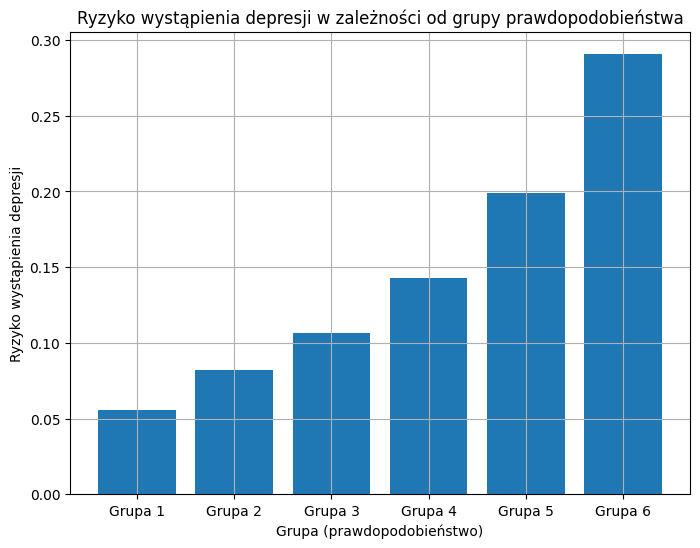

In [26]:
results_df = pd.DataFrame({
    'probability': probabilities,
    'depression': y_val
})

results_df = results_df.sort_values(by='probability')
num_groups = 6
results_df['group'] = pd.qcut(results_df['probability'], num_groups, labels=False)

risk_by_group = results_df.groupby('group').agg(
    total=('probability', 'size'),
    depression_count=('depression', 'sum')
)
risk_by_group['risk'] = risk_by_group['depression_count'] / risk_by_group['total']

plt.figure(figsize=(8, 6))
plt.bar(risk_by_group.index, risk_by_group['risk'])
plt.title('Ryzyko wystąpienia depresji w zależności od grupy prawdopodobieństwa')
plt.xlabel('Grupa (prawdopodobieństwo)')
plt.ylabel('Ryzyko wystąpienia depresji')
plt.xticks(ticks=np.arange(num_groups), labels=[f'Grupa {i+1}' for i in range(num_groups)])
plt.grid(True)
plt.show()

Analizując powyższy wykres można zauważyć, że wraz ze wzrostem numeru grupy, rośnie prawdopodobieństwo ryzyka wystąpienia depresji.

Stworzenie modelu klasyfikującego obserwację do grup ryzyka

In [27]:
quantiles = np.percentile(probabilities, np.linspace(0, 100, num_groups + 1))

def classify_risk_group_quantiles(probability, quantiles):
    """
    Klasyfikuje daną obserwację do jednej z grup ryzyka na podstawie kwantyli.

    Parameters:
    - probability: Wartość prawdopodobieństwa (float).
    - quantiles: Lista kwantyli, które dzielą dane na grupy.

    Returns:
    - Grupa ryzyka (int).
    """
    for i in range(len(quantiles) - 1):
        if quantiles[i] <= probability < quantiles[i + 1]:
            return i
    return len(quantiles) - 2

Ocena liczebności grup ryzyka dla zbioru walidacyjnego

Liczebność poszczególnych grup ryzyka w zbiorze walidacyjnym:
risk_group
0    1074
1    1073
2    1078
3    1070
4    1067
5    1089
Name: count, dtype: int64


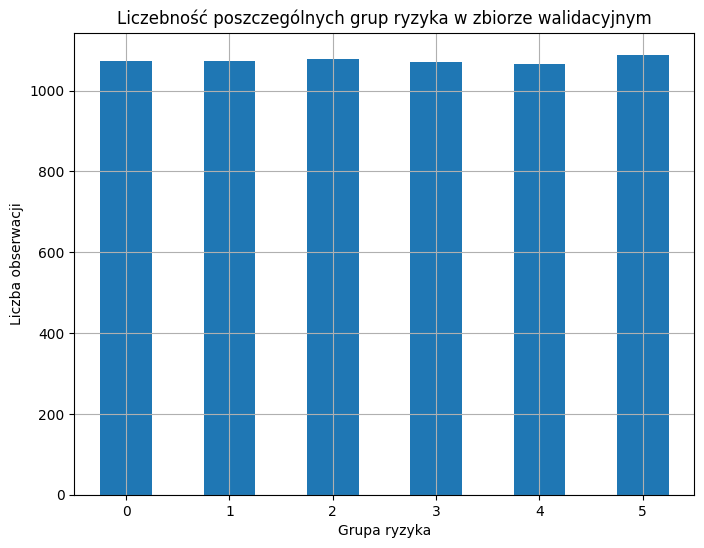

In [28]:
results_df['risk_group'] = results_df['probability'].apply(lambda x: classify_risk_group_quantiles(x, quantiles))

group_counts = results_df['risk_group'].value_counts().sort_index()

print("Liczebność poszczególnych grup ryzyka w zbiorze walidacyjnym:")
print(group_counts)

plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar')
plt.title('Liczebność poszczególnych grup ryzyka w zbiorze walidacyjnym')
plt.xlabel('Grupa ryzyka')
plt.ylabel('Liczba obserwacji')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Na powyższym wykresie oraz danych wyświetlonych nad nim, można zaobserwować, że liczebność każdej z grup ryzyka dla danych walidacyjnych wynosi w przybliżeniu 1075 z niewielkimi odchyleniami.

Analiza grupy o najniższym i najwyższym poziomie ryzyka depresji na podstawie parametrów modelu regresyjnego

In [29]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEPEPISODE   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     44.83
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          3.01e-232
Time:                        00:07:21   Log-Likelihood:                -9269.7
No. Observations:               25800   AIC:                         1.860e+04
Df Residuals:                   25772   BIC:                         1.882e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0120      0.012      1.015      0.310      -0.011       0.035
C(ANYATTACK)[T.1.0]        0.1078      0.010     10.565      0.000       0.088       0.128
C(IREDUC2)[T.2]            0.0277      0.013      2.061      0.039       0.001       0.054
C(IREDUC2)[T.3]            0.0443      0.013      3.317      0.001       0.018       0.071
C(IREDUC2)[T.4]            0.0737      0.013      5.531      0.000       0.048       0.100
C(IREDUC2)[T.5]            0.0706      0.013      5.293      0.000       0.044       0.097
C(IREDUC2)[T.6]            0.1002      0.013      7.465      0.000       0.074       0.126
C(IREDUC2)[T.7]            0.0735      0.014      5.375      0.000       0.047       0.100
C(IREDUC2)[T.8]            0.0746      0.013      5.787      0.000       0.049       0.100
C(IREDUC2)[T.9]            0.0980      0.015      6.519      0.000       0.069       0.127
C(IREDUC2)[T.10]           0.1079      0.014      7.718      0.000       0.080       0.135
C(IREDUC2)[T.11]           0.1138      0.014      8.005      0.000       0.086       0.142
C(ILLICITDRUGUSE)[T.1]     0.1037      0.005     21.267      0.000       0.094       0.113
C(HEALTH2)[T.2.0]          0.0384      0.005      7.446      0.000       0.028       0.048
C(HEALTH2)[T.3.0]          0.0638      0.006     10.554      0.000       0.052       0.076
C(HEALTH2)[T.4.0]          0.1112      0.010     11.298      0.000       0.092       0.130
C(NEWRACE2)[T.2]          -0.0260      0.007     -3.910      0.000      -0.039      -0.013
C(NEWRACE2)[T.3]          -0.0584      0.019     -3.156      0.002      -0.095      -0.022
C(NEWRACE2)[T.4]          -0.0271      0.035     -0.777      0.437      -0.095       0.041
C(NEWRACE2)[T.5]          -0.0129      0.012     -1.050      0.294      -0.037       0.011
C(NEWRACE2)[T.6]           0.0240      0.013      1.838      0.066      -0.002       0.050
C(NEWRACE2)[T.7]          -0.0052      0.006     -0.805      0.421      -0.018       0.007
C(INCOME_R)[T.2]          -0.0265      0.008     -3.506      0.000      -0.041      -0.012
C(INCOME_R)[T.3]          -0.0378      0.009     -4.254      0.000      -0.055      -0.020
C(INCOME_R)[T.4]          -0.0548      0.011     -5.015      0.000      -0.076      -0.033
C(INCOME_R)[T.5]          -0.0745      0.013     -5.574      0.000      -0.101      -0.048
C(INCOME_R)[T.6]          -0.0701      0.013     -5.314      0.000      -0.096      -0.044
C(INCOME_R)[T.7]          -0.0733      0.016     -4.572      0.000      -0.105      -0.042
==============================================================================
Omnibus:                     8038.220   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18297.961
Skew:                    

In [30]:
lowest_risk_group = results_df[results_df['risk_group'] == 0]
print("\nGrupa o najniższym ryzyku depresji:")
print(lowest_risk_group.describe())

highest_risk_group = results_df[results_df['risk_group'] == (num_groups - 1)]
print("\nGrupa o najwyższym ryzyku depresji:")
print(highest_risk_group.describe())


Grupa o najniższym ryzyku depresji:
       probability   depression   group  risk_group
count  1074.000000  1074.000000  1074.0      1074.0
mean      0.511965     0.054935     0.0         0.0
std       0.005419     0.227959     0.0         0.0
min       0.485495     0.000000     0.0         0.0
25%       0.509930     0.000000     0.0         0.0
50%       0.512902     0.000000     0.0         0.0
75%       0.515150     0.000000     0.0         0.0
max       0.519509     1.000000     0.0         0.0

Grupa o najwyższym ryzyku depresji:
       probability   depression        group  risk_group
count  1089.000000  1089.000000  1089.000000      1089.0
mean      0.566141     0.290174     4.960514         5.0
std       0.009309     0.454051     0.194837         0.0
min       0.556651     0.000000     4.000000         5.0
25%       0.559655     0.000000     5.000000         5.0
50%       0.563190     0.000000     5.000000         5.0
75%       0.569484     1.000000     5.000000         5.0
ma

**Grupa o najniższym ryzyku depresji**</br>
Grupa o najniższym ryzyku depresji charakteryzuje się średnim prawdopodobieństwem depresji wynoszącym 0.51. Warto zauważyć, że w tej grupie dominują osoby o średnim poziomie wykształcenia (średnia wartość zmiennej "IREDUC2"), co sugeruje, że osoby te mogą mieć większą stabilność ekonomiczną i społeczną, co wpływa na ich mniejsze ryzyko depresji. Dodatkowo, bardzo niski odsetek osób w tej grupie doświadcza depresji (około 5%). Wydaje się, że te osoby mają także względnie dobry stan zdrowia, ponieważ średnia wartość zmiennej "HEALTH2" wynosi 2, co oznacza, że większość z nich ocenia swoje zdrowie jako „bardzo dobre”. Ponadto, w tej grupie dominują osoby, które nie używają narkotyków ("ILLICITDRUGUSE" = 0), co również może wskazywać na ich mniejszą podatność na problemy psychiczne.</br></br>

**Grupa o najwyższym ryzyku depresji**</br>
Grupa o najwyższym ryzyku depresji (z prawdopodobieństwem depresji wynoszącym 0.57) jest zdecydowanie bardziej zróżnicowana pod względem czynników ryzyka. W tej grupie aż 29% osób doświadcza depresji, co wskazuje na znaczną podatność na zaburzenia psychiczne. Osoby w tej grupie często oceniają swoje zdrowie jako „złe” (średnia wartość "HEALTH2" wynosi 4), co może wskazywać na problemy zdrowotne, które pogłębiają ich stan psychiczny. Ponadto, wyższy odsetek osób w tej grupie korzysta z narkotyków ("ILLICITDRUGUSE" = 1), co może pogłębiać ryzyko rozwoju depresji. Ponadto, te osoby mogą mieć problemy z agresją ("ANYATTACK" = 1), co może być wynikiem frustracji związanej z ich sytuacją życiową.</br></br>

**Podsumowanie**</br>
Grupa o najniższym ryzyku depresji to osoby, które mają stabilne życie emocjonalne i zdrowotne, często z wykształceniem na poziomie średnim lub wyższym, co daje im większe poczucie bezpieczeństwa. Z kolei grupa o najwyższym ryzyku depresji to osoby borykające się z problemami zdrowotnymi, uzależnieniami i agresją, co znacząco zwiększa ich podatność na depresję. Te osoby wymagają szczególnej troski i wsparcia w zakresie zdrowia psychicznego oraz poprawy jakości życia.